# Step#0: Problem Statement

- Image Source: https://commons.wikimedia.org/wiki/File:Chicago_skyline,_viewed_from_John_Hancock_Center.jpg
- The Chicago Crime dataset contains a summary of the reported crimes occurred in the City of Chicago from 2001 to 2017. 
- Dataset has been obtained from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.
- Dataset contains the following columns: 
    - ID: Unique identifier for the record.
    - Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
    - Date: Date when the incident occurred.
    - Block: address where the incident occurred
    - IUCR: The Illinois Unifrom Crime Reporting code.
    - Primary Type: The primary description of the IUCR code.
    - Description: The secondary description of the IUCR code, a subcategory of the primary description.
    - Location Description: Description of the location where the incident occurred.
    - Arrest: Indicates whether an arrest was made.
    - Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
    - Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. 
    - District: Indicates the police district where the incident occurred. 
    - Ward: The ward (City Council district) where the incident occurred. 
    - Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas. 
    - FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). 
    - X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Year: Year the incident occurred.
    - Updated On: Date and time the record was last updated.
    - Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.
- Datasource: https://www.kaggle.com/currie32/crimes-in-chicago

In [5]:
!pip install prophet

                                              0.0/13.3 MB ? eta -:--:--
                                              0.0/13.3 MB ? eta -:--:--
                                             0.0/13.3 MB 640.0 kB/s eta 0:00:21
                                             0.1/13.3 MB 871.5 kB/s eta 0:00:16
     -                                        0.4/13.3 MB 2.9 MB/s eta 0:00:05
     --                                       0.7/13.3 MB 4.0 MB/s eta 0:00:04
     --                                       1.0/13.3 MB 4.1 MB/s eta 0:00:03
     ---                                      1.2/13.3 MB 4.6 MB/s eta 0:00:03
     ----                                     1.6/13.3 MB 4.7 MB/s eta 0:00:03
     ------                                   2.1/13.3 MB 5.6 MB/s eta 0:00:03
     -------                                  2.6/13.3 MB 6.4 MB/s eta 0:00:02
     --------                                 2.9/13.3 MB 6.4 MB/s eta 0:00:02
     --------                                 2.9/13.3 MB 6.4 MB

# Step#1: Importing Data

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

In [9]:
chicago_df_1=pd.read_csv(r'C:\Users\mmanasanjani\Desktop\Extra\MK\RWMLP\Project 3\Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
chicago_df_2=pd.read_csv(r'C:\Users\mmanasanjani\Desktop\Extra\MK\RWMLP\Project 3\Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
chicago_df_3=pd.read_csv(r'C:\Users\mmanasanjani\Desktop\Extra\MK\RWMLP\Project 3\Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

C:\Users\mmanasanjani\AppData\Local\Temp\ipykernel_26956\4070935693.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chicago_df_1=pd.read_csv(r'C:\Users\mmanasanjani\Desktop\Extra\MK\RWMLP\Project 3\Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
Skipping line 533719: expected 23 fields, saw 24

C:\Users\mmanasanjani\AppData\Local\Temp\ipykernel_26956\4070935693.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chicago_df_2=pd.read_csv(r'C:\Users\mmanasanjani\Desktop\Extra\MK\RWMLP\Project 3\Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
Skipping line 1149094: expected 23 fields, saw 41

C:\Users\mmanasanjani\AppData\Local\Temp\ipykernel_26956\4070935693.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_l

In [11]:
chicago_df_1.shape

(1872343, 23)

In [13]:
chicago_df_2.shape

(2688710, 23)

In [14]:
chicago_df_3.shape

(1456714, 23)

In [10]:
chicago_df=pd.concat([chicago_df_1,chicago_df_2,chicago_df_3])

In [15]:
chicago_df.shape

(6017767, 23)

# Step#2: Explore the data/Data Visualization

In [17]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [18]:
chicago_df.tail(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456704,6249417,10508666,HZ250497,05/03/2016 11:30:00 PM,053XX S PULASKI RD,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,...,23.0,62.0,03,1150606.0,1868988.0,2016,05/10/2016 03:56:50 PM,41.796397,-87.723251,"(41.79639731, -87.723251281)"
1456705,6249592,10508671,HZ250526,05/03/2016 11:50:00 PM,036XX E 106TH ST,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,ALLEY,True,...,10.0,52.0,26,1202327.0,1835278.0,2016,05/10/2016 03:56:50 PM,41.702731,-87.534736,"(41.702731182, -87.534736413)"
1456706,6249615,10508672,HZ250441,05/03/2016 10:25:00 PM,071XX S MOZART ST,0460,BATTERY,SIMPLE,SIDEWALK,True,...,18.0,66.0,08B,1158610.0,1857066.0,2016,05/10/2016 03:56:50 PM,41.763522,-87.694225,"(41.763522012, -87.69422464)"
1456707,6249936,10508675,HZ250502,05/03/2016 11:00:00 PM,085XX S MAY ST,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,...,21.0,71.0,03,1170146.0,1848113.0,2016,05/10/2016 03:56:50 PM,41.738711,-87.652203,"(41.738710803, -87.652202523)"
1456708,6250154,10508678,HZ250481,05/03/2016 11:28:00 PM,088XX S LAFLIN ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,21.0,71.0,04B,1167880.0,1846134.0,2016,05/10/2016 03:56:50 PM,41.733329,-87.660561,"(41.733329054, -87.660561367)"
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


<Axes: >

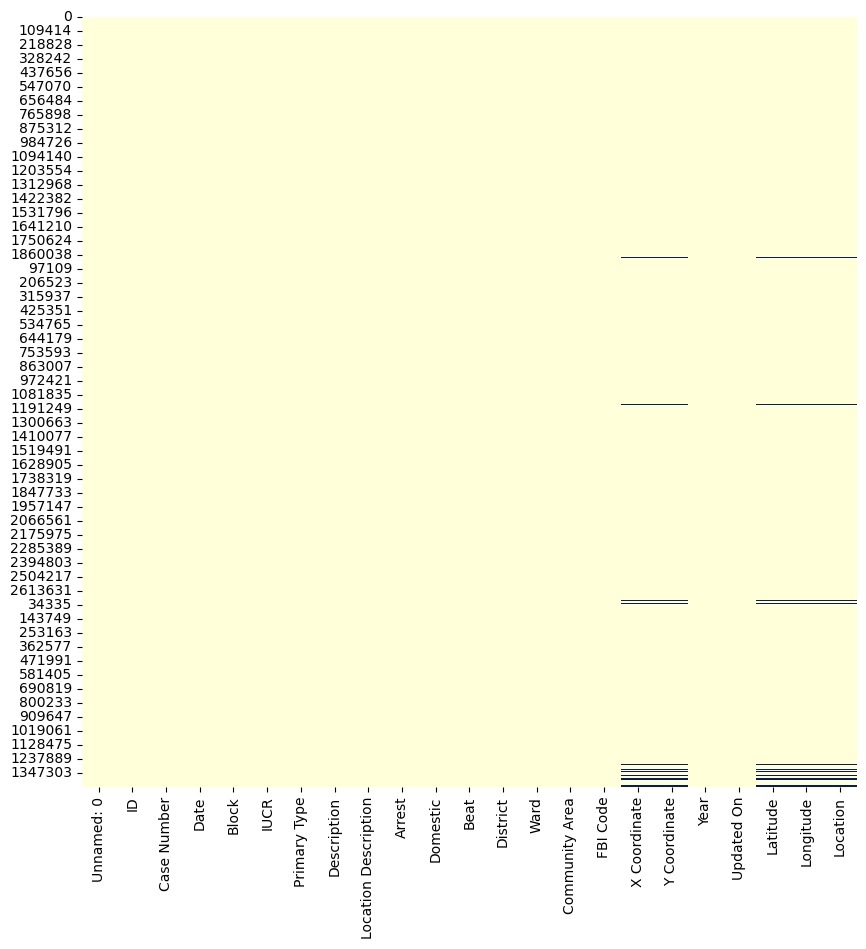

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(),cbar=False,cmap="YlGnBu")

In [21]:
chicago_df.drop(['Unnamed: 0','Case Number','ID','IUCR','X Coordinate','Y Coordinate','Updated On','Year','FBI Code','Beat','Ward','Community Area','Location','District','Latitude','Longitude'],inplace=True,axis=1)

In [22]:
chicago_df.shape

(6017767, 7)

In [23]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
1456709,05/03/2016 11:33:00 PM,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1456710,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
1456711,05/03/2016 12:15:00 AM,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [24]:
chicago_df.Date=pd.to_datetime(chicago_df.Date,format='%m/%d/%Y %I:%M:%S %p') #p--> pm or am

In [25]:
chicago_df.Date

0         2006-04-02 13:00:00
1         2006-02-26 13:40:48
2         2006-01-08 23:16:00
3         2006-04-05 18:45:00
4         2006-02-17 21:03:14
                  ...        
1456709   2016-05-03 23:33:00
1456710   2016-05-03 23:30:00
1456711   2016-05-03 00:15:00
1456712   2016-05-03 21:07:00
1456713   2016-05-03 23:38:00
Name: Date, Length: 6017767, dtype: datetime64[ns]

In [45]:
#chicago_df.index = pd.DateTimeIndex(chicago_df.Date)
chicago_df.index = pd.to_datetime(chicago_df['Date'])

In [46]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2006-04-02 13:00:00,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
2016-05-03 23:33:00,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 23:30:00,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
2016-05-03 00:15:00,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False


In [47]:
chicago_df['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [48]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         1245111
BATTERY                       1079178
CRIMINAL DAMAGE                702702
NARCOTICS                      674831
BURGLARY                       369056
OTHER OFFENSE                  368169
ASSAULT                        360244
MOTOR VEHICLE THEFT            271624
ROBBERY                        229467
DECEPTIVE PRACTICE             225180
CRIMINAL TRESPASS              171596
PROSTITUTION                    60735
WEAPONS VIOLATION               60335
PUBLIC PEACE VIOLATION          48403
OFFENSE INVOLVING CHILDREN      40260
Name: Primary Type, dtype: int64

In [49]:
chicago_df['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY',
       'OTHER OFFENSE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

In [50]:
order_data=chicago_df['Primary Type'].value_counts().iloc[:15].index

<Axes: xlabel='count', ylabel='Primary Type'>

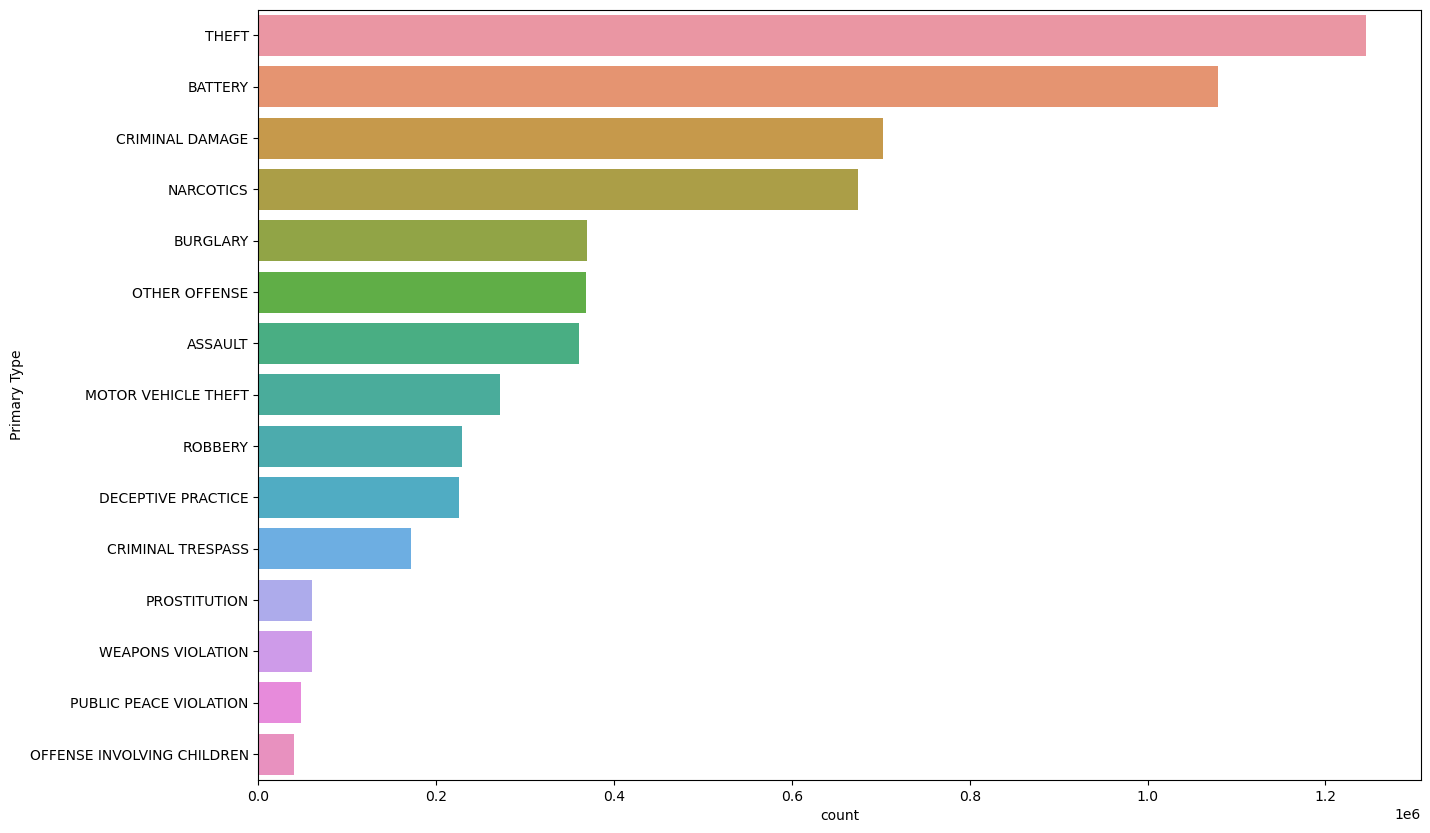

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type',data=chicago_df,order=order_data)

<Axes: xlabel='count', ylabel='Location Description'>

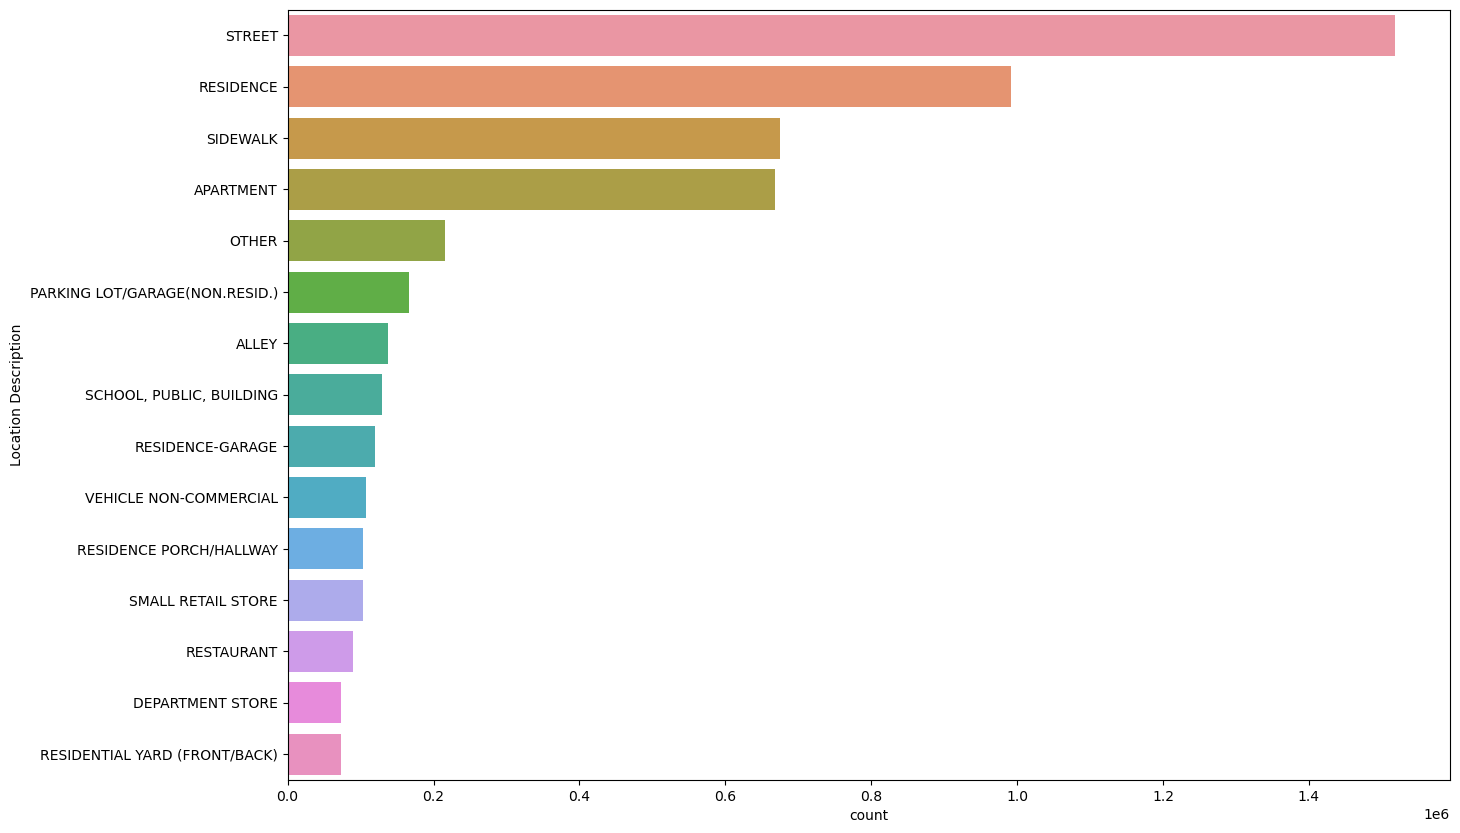

In [52]:
plt.figure(figsize=(15,10))
sns.countplot(y='Location Description', data=chicago_df, order=chicago_df['Location Description'].value_counts().iloc[:15].index)

In [53]:
chicago_df.resample('Y').size() #how many samples(size) occured in an year, to get this, should set date time as index

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

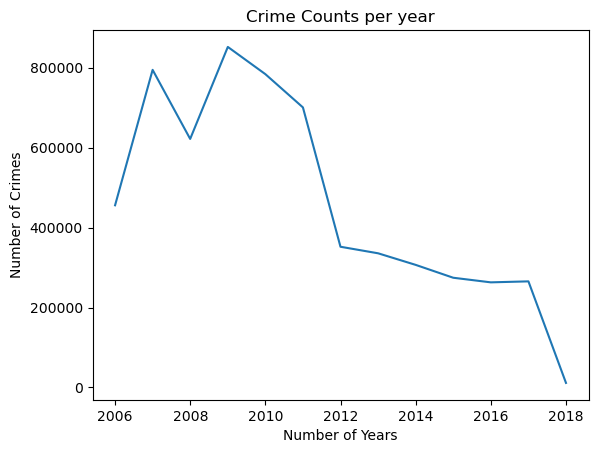

In [54]:
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime Counts per year')
plt.xlabel('Number of Years')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

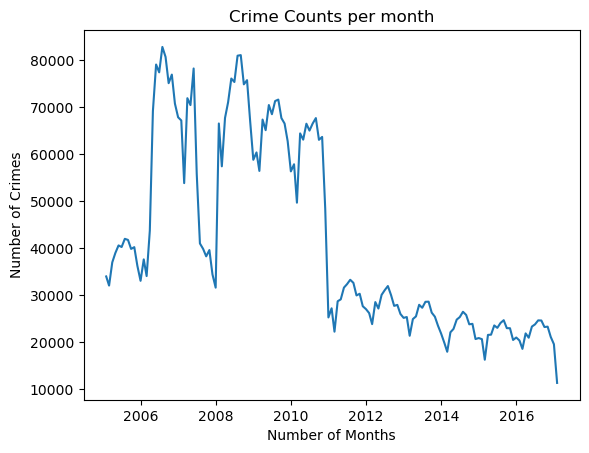

In [56]:
plt.plot(chicago_df.resample('M').size()) #resampling by month
plt.title('Crime Counts per month')
plt.xlabel('Number of Months')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

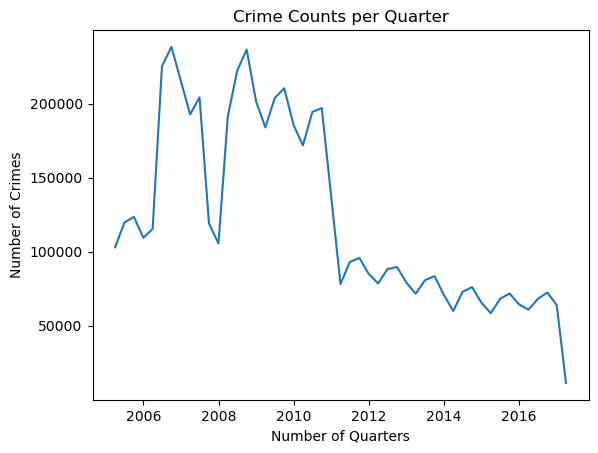

In [59]:
plt.plot(chicago_df.resample('Q').size()) #resampling by quarter
plt.title('Crime Counts per Quarter')
plt.xlabel('Number of Quarters')
plt.ylabel('Number of Crimes')

# Step#3: Prepare the data

In [61]:
chicago_prophet=chicago_df.resample('M').size().reset_index() #actual date index became column, with additional index

In [62]:
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [63]:
chicago_prophet.columns=['Date','Crime Count']

In [64]:
chicago_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [66]:
#need to rename date as DS, Y for easy predictions
chicago_prophet_df_final=chicago_prophet.rename(columns={"Date":"ds","Crime Count":"y"})

In [67]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


# Step#4: Make Predictions

In [68]:
m=Prophet()
m.fit(chicago_prophet_df_final)

23:31:09 - cmdstanpy - INFO - Chain [1] start processing
23:31:12 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
future=m.make_future_dataframe(periods=365) #predict next 1 year data

In [70]:
forecast=m.predict(future)

In [71]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.833000,38419.798948,71583.737648,60454.833000,60454.833000,-4762.390205,-4762.390205,-4762.390205,-4762.390205,-4762.390205,-4762.390205,0.0,0.0,0.0,55692.442795
1,2005-02-28,60322.430432,34070.745008,67099.513767,60322.430432,60322.430432,-9500.517380,-9500.517380,-9500.517380,-9500.517380,-9500.517380,-9500.517380,0.0,0.0,0.0,50821.913052
2,2005-03-31,60175.841875,41616.351969,76991.555920,60175.841875,60175.841875,-1224.147706,-1224.147706,-1224.147706,-1224.147706,-1224.147706,-1224.147706,0.0,0.0,0.0,58951.694169
3,2005-04-30,60033.981981,44536.688298,77938.515355,60033.981981,60033.981981,1182.826674,1182.826674,1182.826674,1182.826674,1182.826674,1182.826674,0.0,0.0,0.0,61216.808655
4,2005-05-31,59887.393424,48923.613430,81857.391520,59887.393424,59887.393424,5498.247091,5498.247091,5498.247091,5498.247091,5498.247091,5498.247091,0.0,0.0,0.0,65385.640515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2018-01-27,10104.391329,-11940.711362,22049.687473,9959.535993,10246.663307,-4977.922716,-4977.922716,-4977.922716,-4977.922716,-4977.922716,-4977.922716,0.0,0.0,0.0,5126.468613
506,2018-01-28,10091.324708,-10586.477564,21111.144765,9944.690745,10234.630619,-4922.570296,-4922.570296,-4922.570296,-4922.570296,-4922.570296,-4922.570296,0.0,0.0,0.0,5168.754412
507,2018-01-29,10078.258087,-11008.237679,21906.512983,9930.856147,10222.067547,-4867.889655,-4867.889655,-4867.889655,-4867.889655,-4867.889655,-4867.889655,0.0,0.0,0.0,5210.368432
508,2018-01-30,10065.191466,-10637.030714,22161.585702,9917.210744,10209.504476,-4816.712501,-4816.712501,-4816.712501,-4816.712501,-4816.712501,-4816.712501,0.0,0.0,0.0,5248.478965


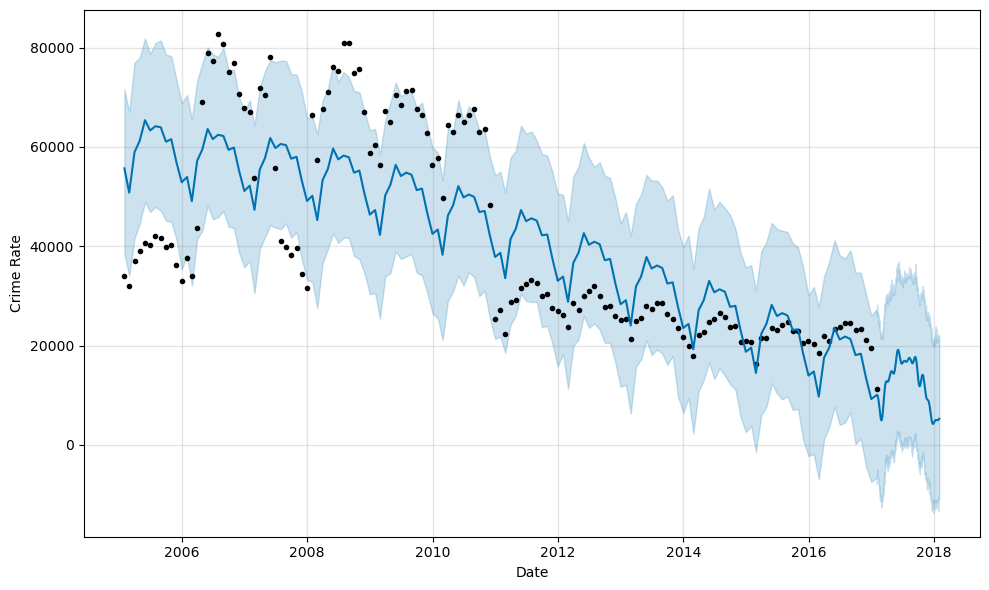

In [72]:
fig=m.plot(forecast,xlabel="Date",ylabel="Crime Rate")

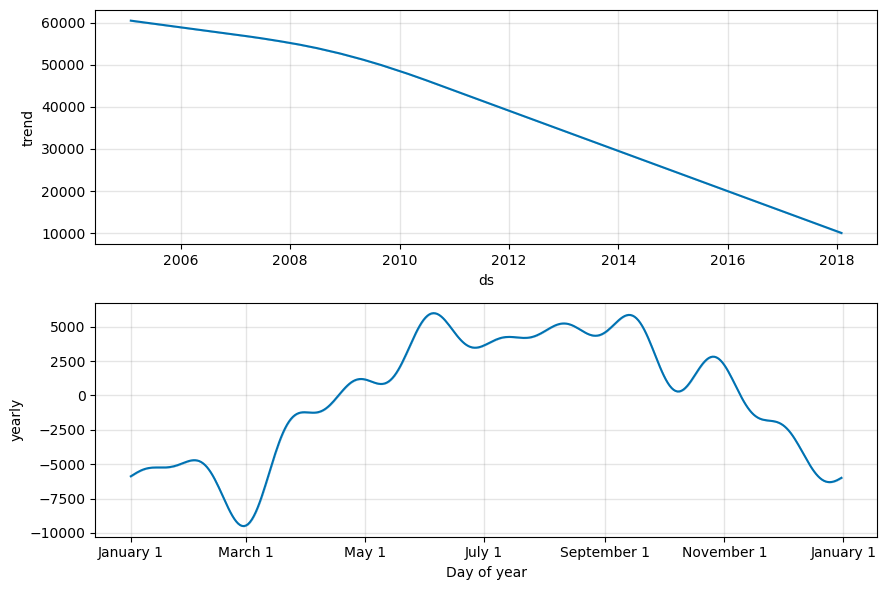

In [73]:
figure=m.plot_components(forecast)

In [75]:
future=m.make_future_dataframe(periods=730) #predict next 2 years data
forecast=m.predict(future)

In [76]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.833000,38726.338756,73318.028515,60454.833000,60454.833000,-4762.390205,-4762.390205,-4762.390205,-4762.390205,-4762.390205,-4762.390205,0.0,0.0,0.0,55692.442795
1,2005-02-28,60322.430432,35515.354182,66279.134787,60322.430432,60322.430432,-9500.517380,-9500.517380,-9500.517380,-9500.517380,-9500.517380,-9500.517380,0.0,0.0,0.0,50821.913052
2,2005-03-31,60175.841875,42996.324955,75807.655665,60175.841875,60175.841875,-1224.147706,-1224.147706,-1224.147706,-1224.147706,-1224.147706,-1224.147706,0.0,0.0,0.0,58951.694169
3,2005-04-30,60033.981981,44362.273807,79403.964981,60033.981981,60033.981981,1182.826674,1182.826674,1182.826674,1182.826674,1182.826674,1182.826674,0.0,0.0,0.0,61216.808655
4,2005-05-31,59887.393424,47952.291532,81927.219640,59887.393424,59887.393424,5498.247091,5498.247091,5498.247091,5498.247091,5498.247091,5498.247091,0.0,0.0,0.0,65385.640515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,2019-01-27,5335.074618,-17612.420560,16768.531049,4866.029292,5783.971790,-4991.565130,-4991.565130,-4991.565130,-4991.565130,-4991.565130,-4991.565130,0.0,0.0,0.0,343.509488
871,2019-01-28,5322.007997,-17481.211663,17133.819924,4851.880308,5771.806575,-4936.449172,-4936.449172,-4936.449172,-4936.449172,-4936.449172,-4936.449172,0.0,0.0,0.0,385.558826
872,2019-01-29,5308.941376,-16406.670783,17387.625209,4837.731325,5759.608632,-4881.347040,-4881.347040,-4881.347040,-4881.347040,-4881.347040,-4881.347040,0.0,0.0,0.0,427.594336
873,2019-01-30,5295.874755,-16319.992086,18205.624795,4823.582341,5747.346282,-4829.012977,-4829.012977,-4829.012977,-4829.012977,-4829.012977,-4829.012977,0.0,0.0,0.0,466.861778


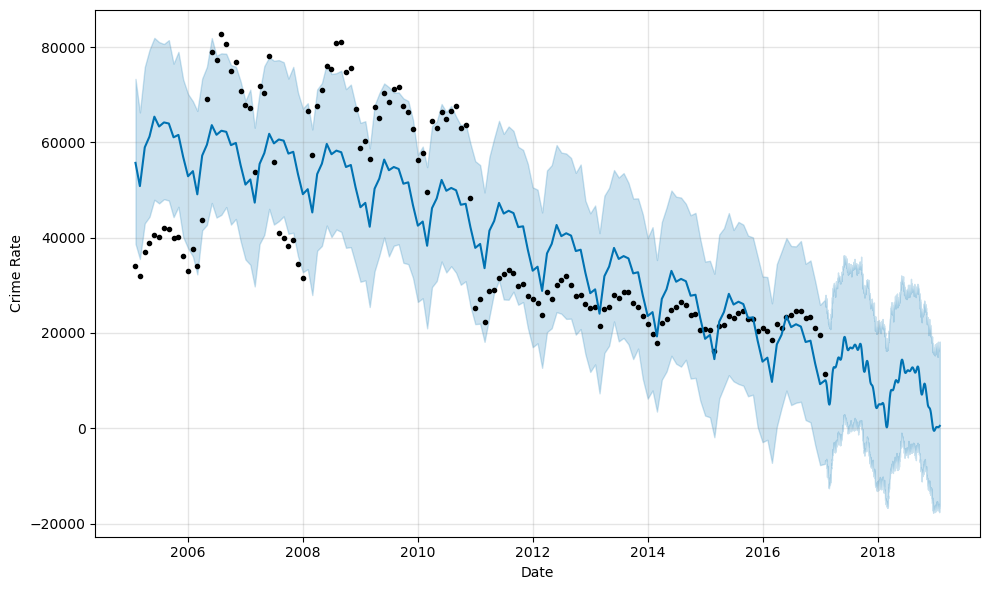

In [77]:
fig=m.plot(forecast,xlabel="Date",ylabel="Crime Rate")

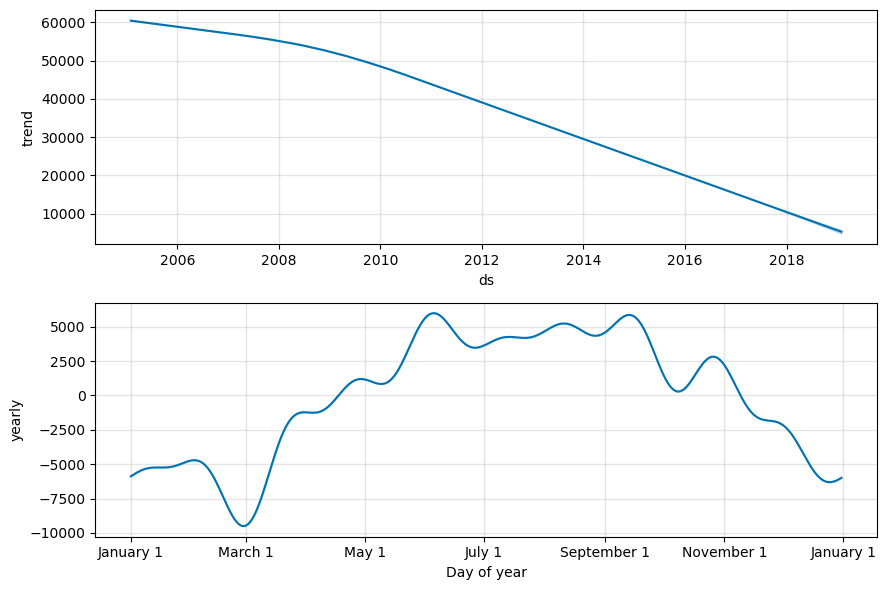

In [78]:
figure=m.plot_components(forecast)